In [38]:
import panama as pn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fluxcomp
import plotly.graph_objects as go
from particle import Particle, literals
from pathlib import Path
import warnings
import os
warnings.filterwarnings("ignore")

In [39]:
run_header, event_header, particles = pn.read_DAT(
    glob='C:/Users/Froxo/OneDrive/Escritorio/Corsika/corsika-77500/run/DAT000006', mother_columns=True
)

def add_concentric_circles(ax, radii, **kwargs):
    for radius in radii:
        circle = plt.Circle((0, 0), radius, **kwargs)
        ax.add_artist(circle)

output_dir = "C:\\Users\\Froxo\\OneDrive\\Escritorio\\Corsika\\Gráficos y simulaciones\\photon\\variable zenith angle (10^5 GeV)\\0°" #<- Importante cambiar el directorio para cada partícula simulada

100%|██████████| 1/1.0 [00:00<00:00, 41.80it/s]


In [40]:
df = pd.DataFrame(particles)
df

particle_description        px  \
run_number event_number particle_number                                   
6          1            0                              1001.0 -0.000253   
                        1                              1001.0  0.001936   
                        2                              1001.0 -0.001014   
                        3                              1001.0  0.000757   
                        4                              1001.0  0.000765   
...                                                       ...       ...   
                        134436                         1021.0 -0.000050   
                        134438                         6521.0 -0.033641   
                        134439                         1991.0  0.001868   
                        134441                         6521.0  0.252665   
                        134442                         1021.0  0.000085   

                                               py        pz             x  \
run_number event_number particle_number                                     
6          1            0                0.001467  0.094197  -1442.190674   
                        1               -0.001015  0.005146  43700.894531   
                        2               -0.000773  0.002325   1101.629395   
                        3               -0.001393  0.002156  35102.535156   
                        4               -0.000581  0.001982 -60994.625000   
...                                           ...       ...           ...   
                        134436           0.000278  0.000393   6990.977539   
                        134438           0.030759  0.811956 -53206.347656   
                        134439           0.000556  0.001180 -29040.986328   
                        134441           0.293094  2.769587  72463.476562   
                        134442           0.000205  0.000384  45550.546875   

                                                     y             t  \
run_number event_number particle_number                                
6          1            0                  7085.579102  55863.203125   
                        1                -34099.718750  56142.398438   
                        2                -30212.365234  56058.566406   
                        3                -57115.351562  56394.953125   
                        4                 -3854.034180  56303.230469   
...                                                ...           ...   
                        134436           133546.625000  56392.359375   
                        134438             1875.253174  56006.625000   
                        134439            56548.503906  56887.085938   
                        134441            74497.335938  56102.843750   
                        134442             -112.975159  56126.945312   

                                         corsikaid  hadron_gen  n_obs_level  \
run_number event_number particle_number                                       
6          1            0                        1           0            1   
                        1                        1           0            1   
                        2                        1           0            1   
                        3                        1           0            1   
                        4                        1           0            1   
...                                            ...         ...          ...   
                        134436                   1           2            1   
                        134438                   6          52            1   
                        134439                   1          99            1   
                        134441                   6          52            1   
                        134442                   1           2            1   

                                         ...  mother_hadr_gen  mother_pdgid  \
run_number event_nu

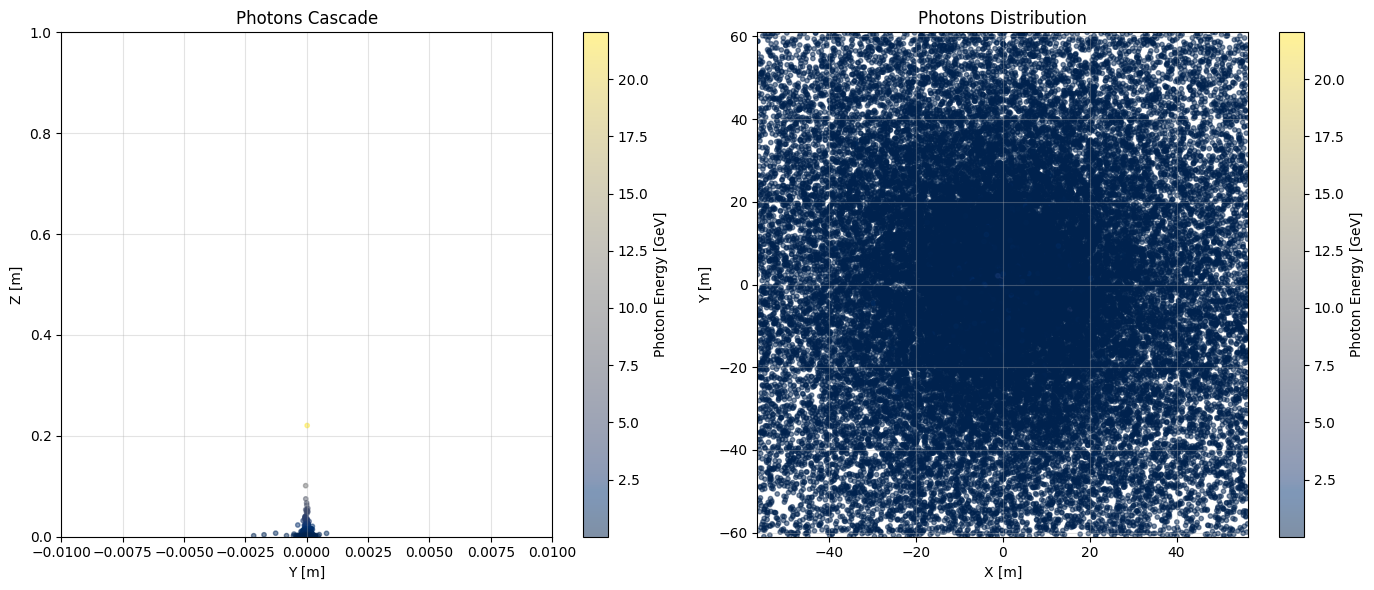

Photons average energy: 0.019286594540696575 [GeV]


In [41]:
# Crear un DataFrame para los fotones
photon_df = particles.query("pdgid == 22")

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico (Photons: Position Y vs Position Z)
mask1 = (photon_df['py']/100 >= -0.01) & (photon_df['py']/100 <= 0.01) & (photon_df['pz']/100 >= 0) & (photon_df['pz']/100 <= 1)
filtered_df1 = photon_df[mask1]
color1 = filtered_df1['energy']
scatter1 = ax1.scatter((filtered_df1['py'])/100, (filtered_df1['pz'])/100, c=color1, s=10, alpha=0.5, cmap='cividis')
ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Photons Cascade')
ax1.grid(alpha=0.35)
ax1.set_xlim(-0.01, 0.01)
ax1.set_ylim(0, 1)
cbar1 = fig.colorbar(scatter1, ax=ax1, label='Photon Energy [GeV]')
scatter1.set_clim(color1.min(), color1.max())

# Segundo gráfico (Photons: Position X vs Position Y)
mask2 = (photon_df['x']/100 >= -113/2) & (photon_df['x']/100 <= 113/2) & (photon_df['y']/100 >= -61) & (photon_df['y']/100 <= 61)
filtered_df2 = photon_df[mask2]
color2 = filtered_df2['energy']
scatter2 = ax2.scatter((filtered_df2['x'])/100, (filtered_df2['y'])/100, c=color2, s=10, alpha=0.5, cmap='cividis')
ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Photons Distribution')
ax2.grid(alpha=0.35)
ax2.set_ylim(-122/2, 122/2)
ax2.set_xlim(-113/2, 113/2)
cbar2 = fig.colorbar(scatter2, ax=ax2, label='Photon Energy [GeV]')
scatter2.set_clim(color2.min(), color2.max())

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()
plt.savefig(os.path.join(output_dir, "Photons_Cascade_Distribution.png"))
# Mostrar la figura con ambos subplots
plt.show()

print("Photons average energy:", np.mean(photon_df["energy"]), "[GeV]")

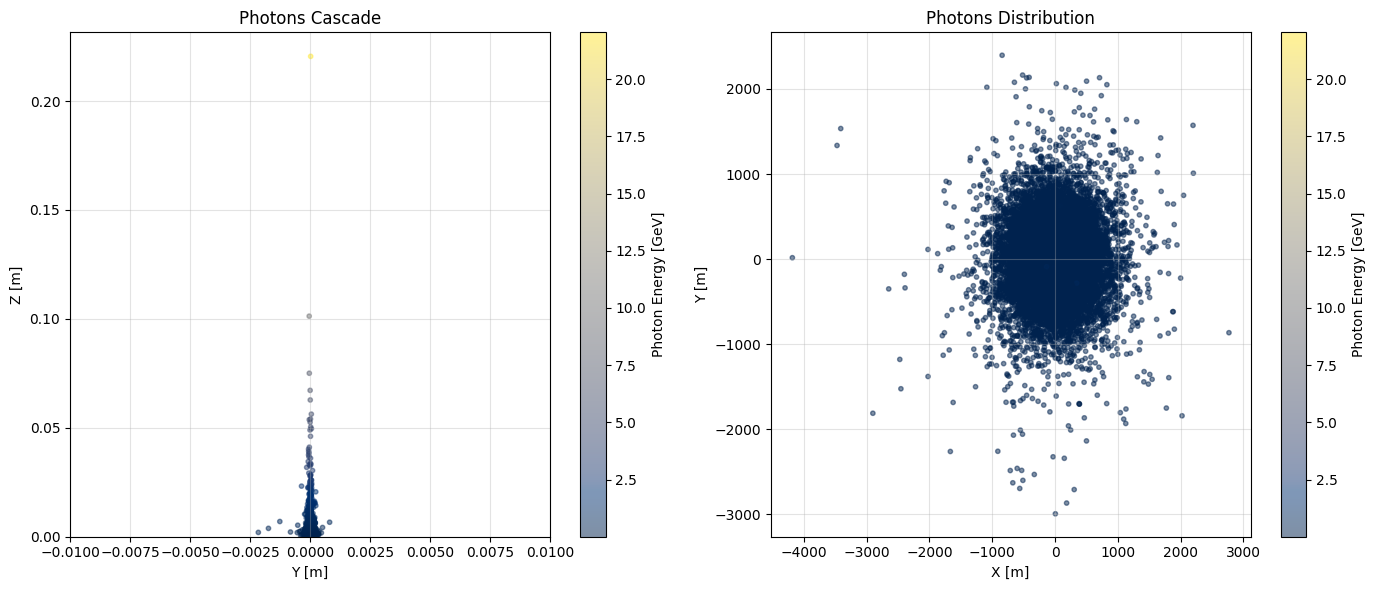

In [42]:
# Crear un DataFrame para los fotones
photon_df = particles.query("pdgid == 22")

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico (Photons: Position Y vs Position Z)
color1 = photon_df['energy']
scatter1 = ax1.scatter((photon_df['py'])/100, (photon_df['pz'])/100, c=color1, s=10, alpha=0.5, cmap='cividis')
ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Photons Cascade')
ax1.grid(alpha=0.35)
ax1.set_xlim(-0.01, 0.01)
ax1.set_ylim(0,)
cbar1 = fig.colorbar(scatter1, ax=ax1, label='Photon Energy [GeV]')
scatter1.set_clim(color1.min(), color1.max())

color2 = photon_df['energy']
scatter2 = ax2.scatter((photon_df['x'])/100, (photon_df['y'])/100, c=color2, s=10, alpha=0.5, cmap='cividis')
ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Photons Distribution')
ax2.grid(alpha=0.35)
#ax2.set_xlim(-5, 5)
#ax2.set_ylim(-5, 5)
cbar2 = fig.colorbar(scatter2, ax=ax2, label='Photon Energy [GeV]')
scatter2.set_clim(color2.min(), color2.max())

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()
plt.savefig(os.path.join(output_dir, "Photons_Cascade_Distribution_Unscaled.png"))
# Mostrar la figura con ambos subplots
plt.show()

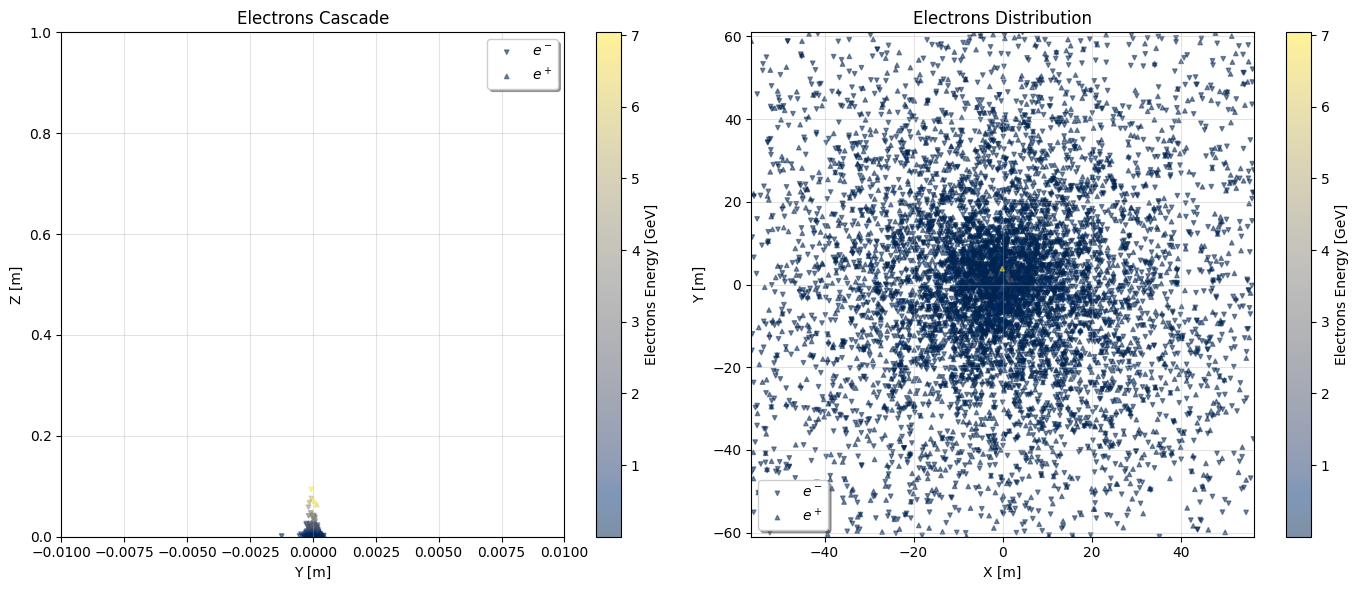

Electrons and Positrons average energy: 0.06858634229464419 [GeV]


In [43]:
# Crear un DataFrame para los electrones y positrones
electron_df = particles.query("pdgid in (11, -11)")

# Diccionario de marcadores para los electrones y positrones
markers = {
    11: 'v',    # Triángulo hacia abajo para electrones
    -11: '^',   # Triángulo hacia arriba para positrones
}

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico (Electrons: Position Y vs Position Z)
for pdgid, marker in markers.items():
    subset = electron_df[electron_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    mask1 = (subset['py']/100 >= -0.01) & (subset['py']/100 <= 0.01) & (subset['pz']/100 >= 0) & (subset['pz']/100 <= 1)
    filtered_subset1 = subset[mask1]
    color1 = filtered_subset1['energy']
    label = '$e^-$' if pdgid == 11 else '$e^+$'
    scatter1 = ax1.scatter((filtered_subset1['py'])/100, (filtered_subset1['pz'])/100, c=color1, s=10, alpha=0.5, cmap='cividis', marker=marker, label=label)

ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Electrons Cascade')
ax1.set_xlim(-0.01, 0.01)
ax1.set_ylim(0, 1)
ax1.legend(shadow=True)
ax1.grid(alpha=0.35)    
cbar1 = fig.colorbar(scatter1, ax=ax1, label='Electrons Energy [GeV]')
scatter1.set_clim(color1.min(), color1.max())

# Segundo gráfico (Electrons: Position X vs Position Y)
for pdgid, marker in markers.items():
    subset = electron_df[electron_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    mask2 = (subset['x']/100 >= -113/2) & (subset['x']/100 <= 113/2) & (subset['y']/100 >= -61) & (subset['y']/100 <= 61)
    filtered_subset2 = subset[mask2]
    color2 = filtered_subset2['energy']
    label = '$e^-$' if pdgid == 11 else '$e^+$'
    scatter2 = ax2.scatter((filtered_subset2['x'])/100, (filtered_subset2['y'])/100, c=color2, alpha=0.5, s=10, cmap='cividis', marker=marker, label=label)

ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Electrons Distribution')
ax2.grid(alpha=0.35)
ax2.set_ylim(-122/2, 122/2)
ax2.set_xlim(-113/2, 113/2)
cbar2 = fig.colorbar(scatter2, ax=ax2, label='Electrons Energy [GeV]')
scatter2.set_clim(color2.min(), color2.max())

# Agregar la leyenda al segundo gráfico
ax2.legend(shadow=True)

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()
plt.savefig(os.path.join(output_dir, "Electrons_Cascade_Distribution.png"))
# Mostrar la figura con ambos subplots
plt.show()

# Imprimir la energía promedio de los electrones y positrones
print("Electrons and Positrons average energy:", np.mean(electron_df["energy"]), "[GeV]")


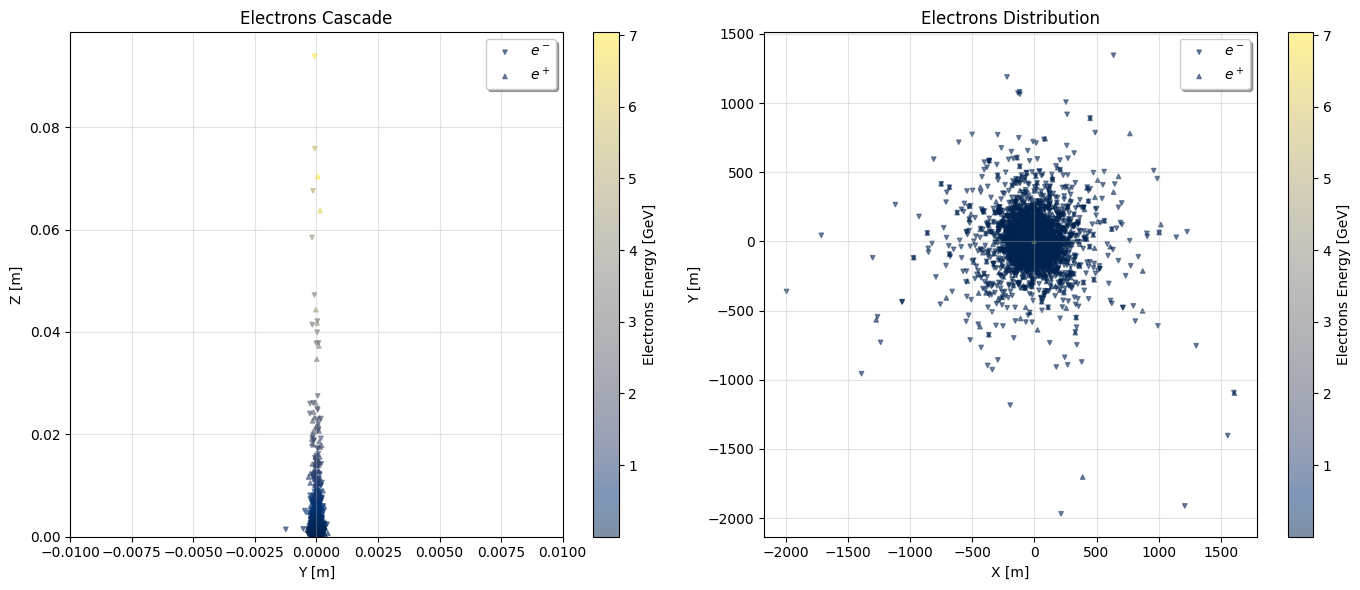

In [44]:
electron_df = particles.query("pdgid in (11, -11)")

# Diccionario de marcadores para los electrones y positrones
markers = {
    11: 'v',    # Triángulo hacia abajo para electrones
    -11: '^',   # Triángulo hacia arriba para positrones
}

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico (Electrons: Position Y vs Position Z)
for pdgid, marker in markers.items():
    subset = electron_df[electron_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    color1 = subset['energy']
    label = '$e^-$' if pdgid == 11 else '$e^+$'
    scatter1 = ax1.scatter((subset['py'])/100, (subset['pz'])/100, c=color1, s=10, alpha=0.5, cmap='cividis', marker=marker, label=label)

ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Electrons Cascade')
ax1.set_xlim(-0.01, 0.01)
ax1.set_ylim(0, )
ax1.legend(shadow=True)
ax1.grid(alpha=0.35)    
cbar1 = fig.colorbar(scatter1, ax=ax1, label='Electrons Energy [GeV]')
scatter1.set_clim(color1.min(), color1.max())

# Segundo gráfico (Electrons: Position X vs Position Y)
for pdgid, marker in markers.items():
    subset = electron_df[electron_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    color2 = subset['energy']
    label = '$e^-$' if pdgid == 11 else '$e^+$'
    scatter2 = ax2.scatter((subset['x'])/100, (subset['y'])/100, c=color2, alpha=0.5, s=10, cmap='cividis', marker=marker, label=label)

ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Electrons Distribution')
ax2.grid(alpha=0.35)
#ax2.set_xlim(-5, 5)
#ax2.set_ylim(-5, 5)
cbar2 = fig.colorbar(scatter2, ax=ax2, label='Electrons Energy [GeV]')
scatter2.set_clim(color2.min(), color2.max())

# Agregar la leyenda al segundo gráfico
ax2.legend(shadow=True)

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()
plt.savefig(os.path.join(output_dir, "Electrons_Cascade_Distribution_Unscaled.png"))
# Mostrar la figura con ambos subplots
plt.show()

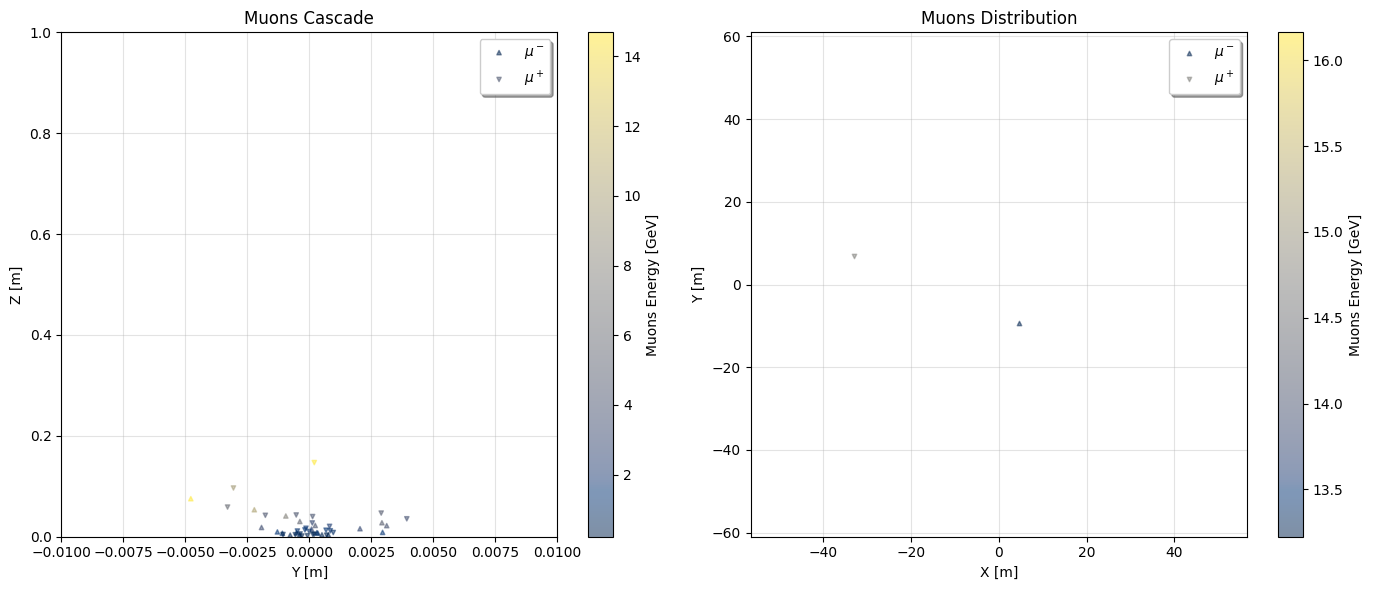

Muons average energy: 2.370833443378604 [GeV]


In [45]:
# Crear un DataFrame para los muones
muon_df = particles.query("pdgid in (13, -13)")

# Diccionario de marcadores para los muones
markers = {
    13: '^',    # Triángulo hacia arriba para \(\mu^-\)
    -13: 'v',   # Triángulo hacia abajo para \(\mu^+\)
}

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico (Muons: Position Y vs Position Z)
for pdgid, marker in markers.items():
    subset = muon_df[muon_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    mask1 = (subset['py']/100 >= -0.01) & (subset['py']/100 <= 0.01) & (subset['pz']/100 >= 0) & (subset['pz']/100 <= 1)
    filtered_subset1 = subset[mask1]
    color1 = filtered_subset1['energy']
    label = r'$\mu^-$' if pdgid == 13 else r'$\mu^+$'
    scatter1 = ax1.scatter(filtered_subset1['py']/100, filtered_subset1['pz']/100, c=color1, alpha=0.5, s=10, cmap='cividis', marker=marker, label=label)

ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Muons Cascade')
ax1.set_xlim(-0.01, 0.01)
ax1.set_ylim(0, 1)
ax1.grid(alpha=0.35)
ax1.legend(shadow=True)
cbar1 = fig.colorbar(scatter1, ax=ax1, label='Muons Energy [GeV]')
scatter1.set_clim(color1.min(), color1.max())

# Segundo gráfico (Muons: Position X vs Position Y)
for pdgid, marker in markers.items():
    subset = muon_df[muon_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    mask2 = (subset['x']/100 >= -113/2) & (subset['x']/100 <= 113/2) & (subset['y']/100 >= -61) & (subset['y']/100 <= 61)
    filtered_subset2 = subset[mask2]
    color2 = filtered_subset2['energy']
    label = r'$\mu^-$' if pdgid == 13 else r'$\mu^+$'
    scatter2 = ax2.scatter(filtered_subset2['x']/100, filtered_subset2['y']/100, c=color2, alpha=0.5, s=10, cmap='cividis', marker=marker, label=label)

ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Muons Distribution')
ax2.grid(alpha=0.35)
ax2.set_ylim(-122/2, 122/2)
ax2.set_xlim(-113/2, 113/2)
cbar2 = fig.colorbar(scatter2, ax=ax2, label='Muons Energy [GeV]')
scatter2.set_clim(color2.min(), color2.max())

# Agregar la leyenda al segundo gráfico
ax2.legend(shadow=True)

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()
plt.savefig(os.path.join(output_dir, "Muons_Cascade_Distribution.png"))
# Mostrar la figura con ambos subplots
plt.show()

# Imprimir la energía promedio de los muones
print("Muons average energy:", np.mean(muon_df["energy"]), "[GeV]")


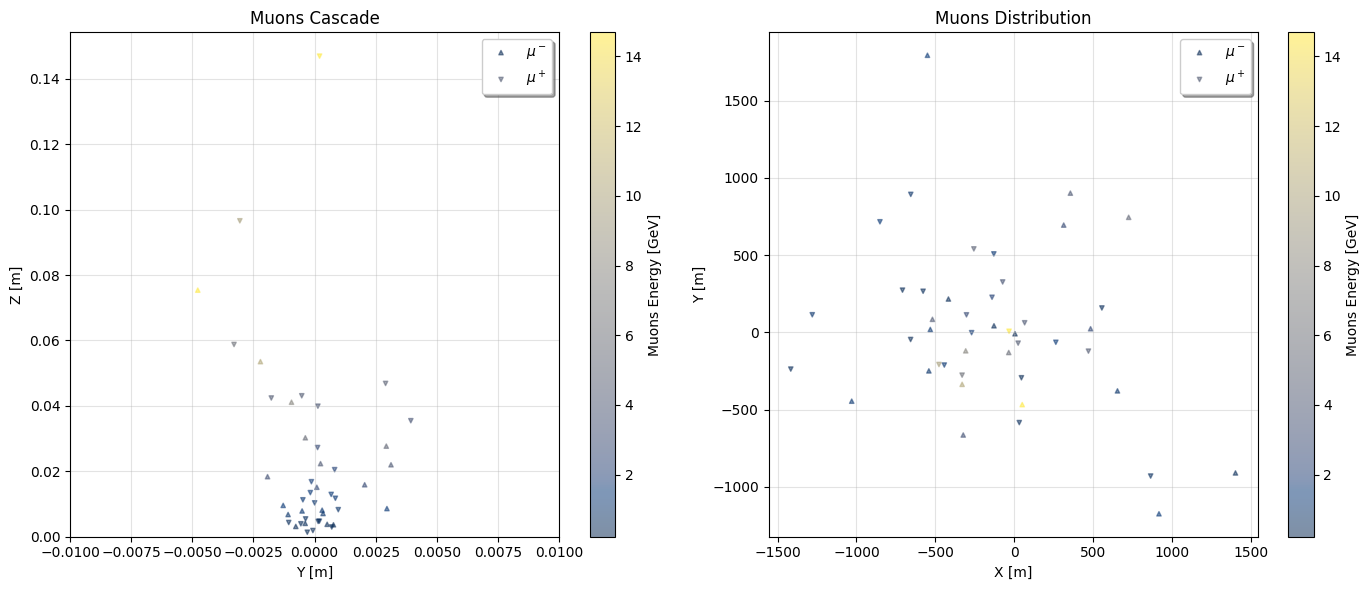

In [46]:
# Crear un DataFrame para los muones
muon_df = particles.query("pdgid in (13, -13)")

# Diccionario de marcadores para los muones
markers = {
    13: '^',    # Triángulo hacia arriba para \(\mu^-\)
    -13: 'v',   # Triángulo hacia abajo para \(\mu^+\)
}

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico (Muons: Position Y vs Position Z)
for pdgid, marker in markers.items():
    subset = muon_df[muon_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    color1 = subset['energy']
    label = r'$\mu^-$' if pdgid == 13 else r'$\mu^+$'
    scatter1 = ax1.scatter(subset['py']/100, subset['pz']/100, c=subset["energy"], alpha=0.5, s=10, cmap='cividis', marker=marker, label=label)

ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Muons Cascade')
ax1.set_xlim(-0.01, 0.01)
ax1.set_ylim(0,)
ax1.grid(alpha=0.35)
ax1.legend(shadow=True)
cbar1 = fig.colorbar(scatter1, ax=ax1, label='Muons Energy [GeV]')
scatter1.set_clim(color1.min(), color1.max())

# Segundo gráfico (Muons: Position X vs Position Y)
for pdgid, marker in markers.items():
    subset = muon_df[muon_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    color2unscaled = subset["energy"]
    label = r'$\mu^-$' if pdgid == 13 else r'$\mu^+$'
    scatter2unscaled = ax2.scatter(subset['x']/100, subset['y']/100, c=color2unscaled, alpha=0.5, s=10, cmap='cividis', marker=marker, label=label)

ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Muons Distribution')
ax2.grid(alpha=0.35)
cbar2unscaled = fig.colorbar(scatter2unscaled, ax=ax2, label='Muons Energy [GeV]')
scatter2unscaled.set_clim(color2unscaled.min(), color2unscaled.max())

# Agregar la leyenda al segundo gráfico
ax2.legend(shadow=True)

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()
plt.savefig(os.path.join(output_dir, "Muons_Cascade_Distribution_Unscaled.png"))
# Mostrar la figura con ambos subplots
plt.show()

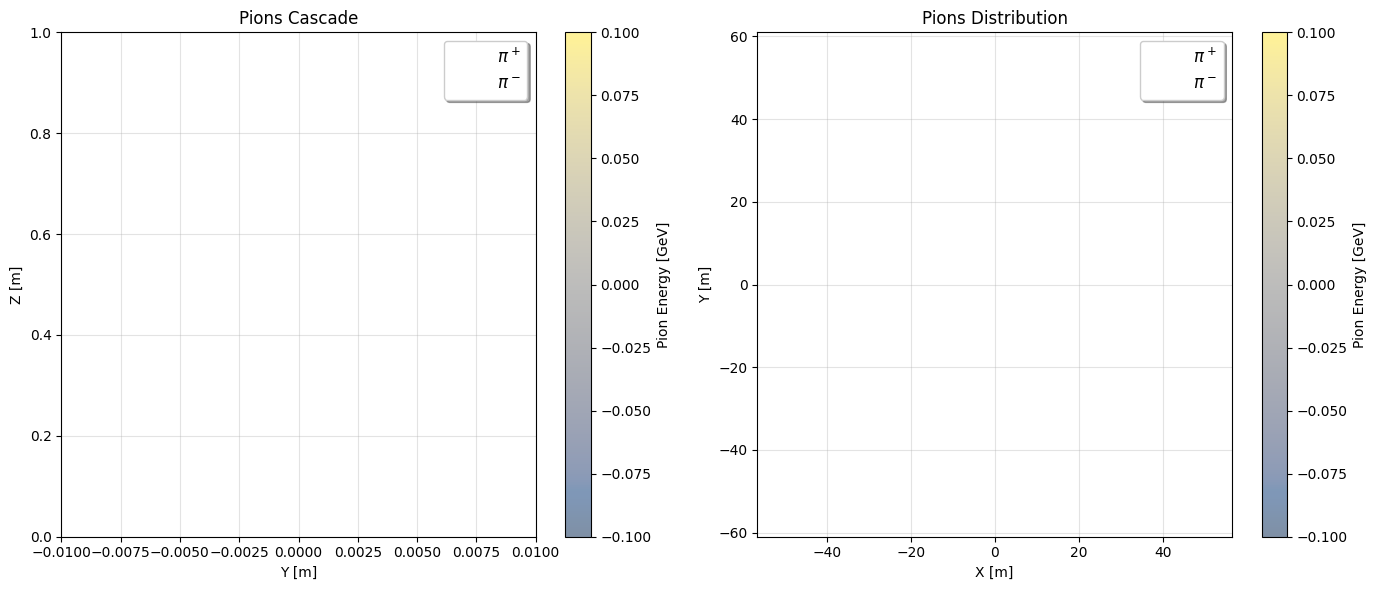

Pions average energy: nan [GeV]


In [47]:
pion_df = particles.query("pdgid in (211, -211)")

# Diccionario de marcadores para los piones
markers = {
    211: '^',    # Triángulo hacia arriba para \(\pi^+\)
    -211: 'v',   # Triángulo hacia abajo para \(\pi^-\)
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico
for pdgid, marker in markers.items():
    subset = pion_df[pion_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    mask1 = (subset['py']/100 >= -0.01) & (subset['py']/100 <= 0.01) & (subset['pz']/100 >= 0) & (subset['pz']/100 <= 1)
    filtered_subset1 = subset[mask1]
    color1 = filtered_subset1['energy']
    label = r'$\pi^+$' if pdgid == 211 else r'$\pi^-$'
    scatter1 = ax1.scatter((filtered_subset1['py'])/100, (filtered_subset1['pz'])/100, c=color1, alpha=0.5, s=10, cmap='cividis', marker=marker, label=label)

ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Pions Cascade')
ax1.set_xlim(-0.01, 0.01)
ax1.set_ylim(0, 1)
ax1.grid(alpha=0.35)
ax1.legend(fontsize='large', shadow=True)
cbar1 = fig.colorbar(scatter1, ax=ax1, label='Pion Energy [GeV]')
scatter1.set_clim(color1.min(), color1.max())

# Segundo gráfico (Distribución)
for pdgid, marker in markers.items():
    subset = pion_df[pion_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    mask2 = (subset['x']/100 >= -113/2) & (subset['x']/100 <= 113/2) & (subset['y']/100 >= -61) & (subset['y']/100 <= 61)
    filtered_subset2 = subset[mask2]
    color2 = filtered_subset2['energy']
    label = r'$\pi^+$' if pdgid == 211 else r'$\pi^-$'
    scatter2 = ax2.scatter((filtered_subset2['x'])/100, (filtered_subset2['y'])/100, c=color2, alpha=0.5, s=10, cmap='cividis', marker=marker, label=label)

ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Pions Distribution')
ax2.grid(alpha=0.35)
ax2.set_ylim(-122/2, 122/2)
ax2.set_xlim(-113/2, 113/2)
cbar2 = fig.colorbar(scatter2, ax=ax2, label='Pion Energy [GeV]')
scatter2.set_clim(color2.min(), color2.max())

# Agregar la leyenda al segundo gráfico
ax2.legend(fontsize='large', shadow=True)

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()
plt.savefig(os.path.join(output_dir, "PionsCascade_Distribution.png"))
# Mostrar la figura con ambos subplots
plt.show()

# Imprimir la energía promedio de los piones
print("Pions average energy:", np.mean(pion_df["energy"]), "[GeV]")


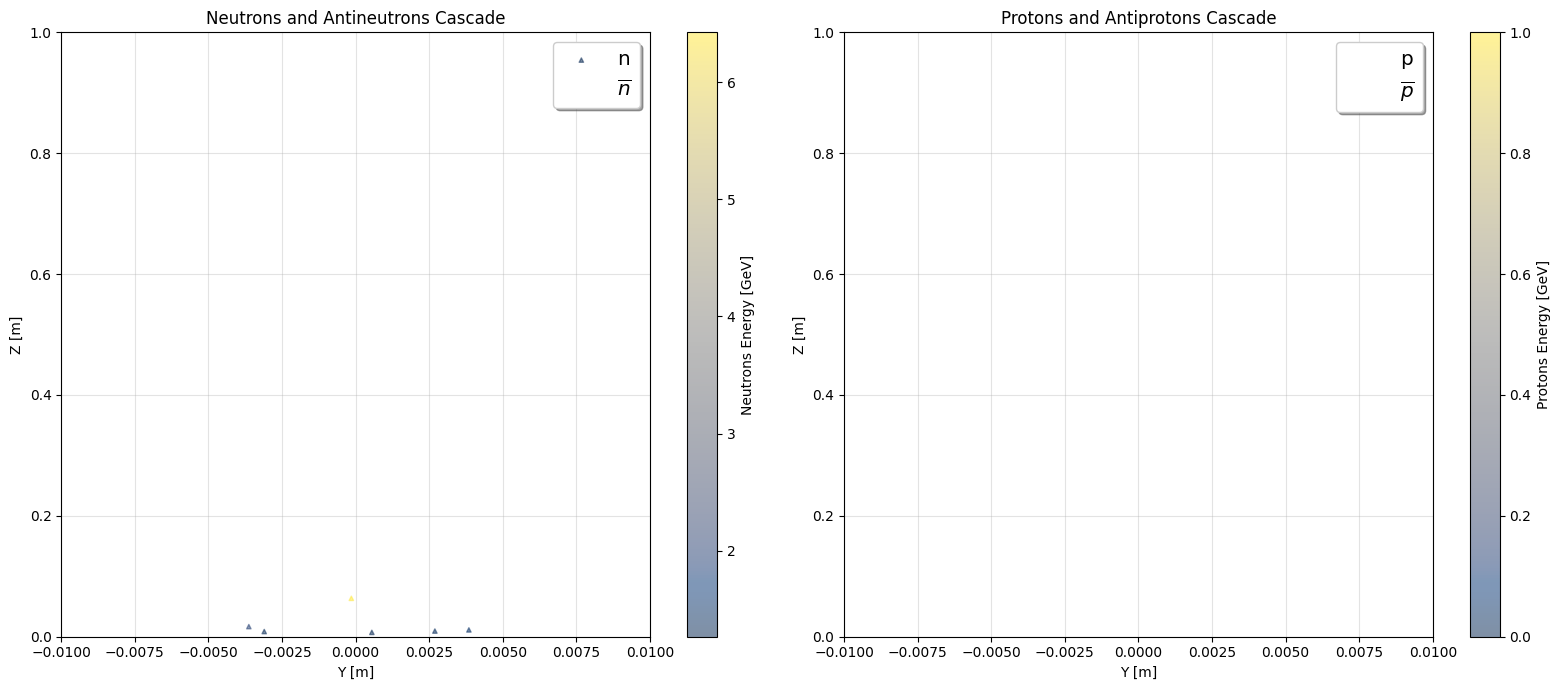

Neutrons and Antineutrons average energy: 2.3114411220888553 [GeV]
Protons and Antiprotons average energy: nan [GeV]


In [48]:
# Crear un DataFrame para los núcleos
nuclei_df = particles.query("pdgid in (2112, 2212, -2112, -2212)")

# Diccionario de marcadores
marker_dict = {
    2112: '^',   # Neutrón
    -2112: 'o',  # Anti-neutrón
    2212: 's',   # Protón
    -2212: 'x',  # Anti-protón
}

# Crear DataFrames separados para cada tipo de partícula
neutrons_antineutrons_df = nuclei_df.query("pdgid in (2112, -2112)")
protons_antiprotons_df = nuclei_df.query("pdgid in (2212, -2212)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Primer gráfico para neutrones y antineutrones
for pdgid, marker in marker_dict.items():
    if pdgid in [2112, -2112]:
        subset = neutrons_antineutrons_df[neutrons_antineutrons_df['pdgid'] == pdgid]
        mask1 = (subset['py']/100 >= -0.01) & (subset['py']/100 <= 0.01) & (subset['pz']/100 >= 0) & (subset['pz']/100 <= 1)
        filtered_subset = subset[mask1]
        color = filtered_subset['energy']
        label = r'$\overline{n}$' if pdgid == -2112 else 'n'
        scatter1 = ax1.scatter((filtered_subset['py'])/100, (filtered_subset['pz'])/100, c=color, alpha=0.5, s=10, cmap='cividis', marker=marker, label=label)

ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Neutrons and Antineutrons Cascade')
ax1.grid(alpha=0.35)
ax1.legend(fontsize='x-large', shadow=True)
fig.colorbar(ax1.collections[0], ax=ax1, label='Neutrons Energy [GeV]')
ax1.set_xlim(-0.01, 0.01)
ax1.set_ylim(0, 1)

# Segundo gráfico para protones y antiprotones
for pdgid, marker in marker_dict.items():
    if pdgid in [2212, -2212]:
        subset = protons_antiprotons_df[protons_antiprotons_df['pdgid'] == pdgid]
        mask2 = (subset['py']/100 >= -0.01) & (subset['py']/100 <= 0.01) & (subset['pz']/100 >= 0) & (subset['pz']/100 <= 1)
        filtered_subset = subset[mask2]
        color = filtered_subset['energy']
        label = r'$\overline{p}$' if pdgid == -2212 else 'p'
        scatter2 = ax2.scatter((filtered_subset['py'])/100, (filtered_subset['pz'])/100, c=color, alpha=0.5, s=10, cmap='cividis', marker=marker, label=label)

ax2.set_xlabel('Y [m]')
ax2.set_ylabel('Z [m]')
ax2.set_title('Protons and Antiprotons Cascade')
ax2.grid(alpha=0.35)
ax2.legend(fontsize='x-large', shadow=True)
fig.colorbar(ax2.collections[0], ax=ax2, label='Protons Energy [GeV]')
ax2.set_xlim(-0.01, 0.01)
ax2.set_ylim(0, 1)

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()

# Guardar y mostrar la figura
plt.savefig(os.path.join(output_dir, "Nuclei_Cascades.png"))
plt.show()

# Imprimir la energía promedio de neutrones y antineutrones, protones y antiprotones
print("Neutrons and Antineutrons average energy:", np.mean(neutrons_antineutrons_df["energy"]), "[GeV]")
print("Protons and Antiprotons average energy:", np.mean(protons_antiprotons_df["energy"]), "[GeV]")


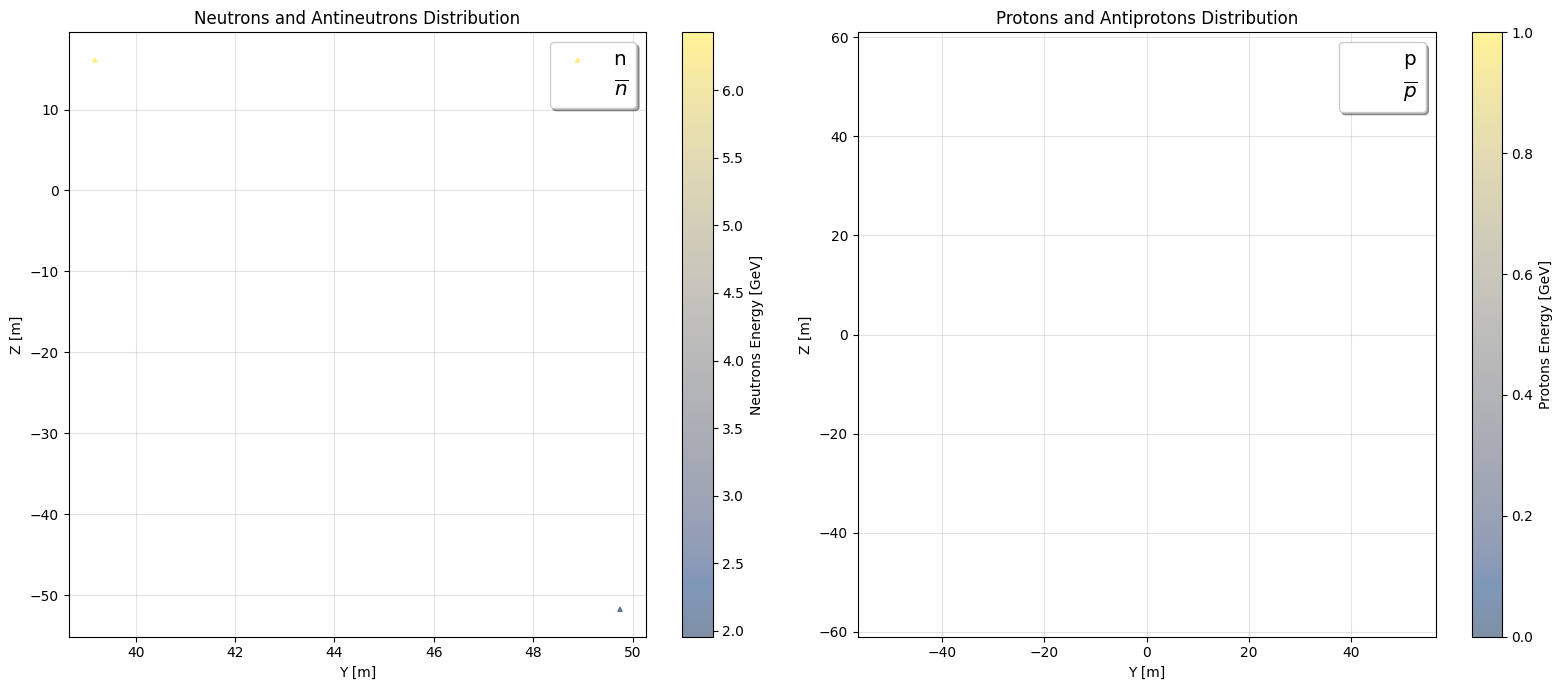

Neutrons and Antineutrons average energy: 2.3114411220888553 [GeV]
Protons and Antiprotons average energy: nan [GeV]


In [49]:
# Crear un DataFrame para los núcleos
nuclei_df = particles.query("pdgid in (2112, 2212, -2112, -2212)")

# Diccionario de marcadores
marker_dict = {
    2112: '^',   # Neutrón
    -2112: 'o',  # Anti-neutrón
    2212: 's',   # Protón
    -2212: 'x',  # Anti-protón
}

# Crear DataFrames separados para cada tipo de partícula
neutrons_antineutrons_df = nuclei_df.query("pdgid in (2112, -2112)")
protons_antiprotons_df = nuclei_df.query("pdgid in (2212, -2212)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Primer gráfico para neutrones y antineutrones
for pdgid, marker in marker_dict.items():
    if pdgid in [2112, -2112]:
        subset = neutrons_antineutrons_df[neutrons_antineutrons_df['pdgid'] == pdgid]
        mask1 = (subset['x']/100 >= -113/2) & (subset['x']/100 <= 113/2) & (subset['y']/100 >= -61) & (subset['y']/100 <= 61)
        filtered_subset = subset[mask1]
        color = filtered_subset['energy']
        label = r'$\overline{n}$' if pdgid == -2112 else 'n'
        scatter1 = ax1.scatter((filtered_subset['x'])/100, (filtered_subset['y'])/100, c=color, alpha=0.5, s=10, cmap='cividis', marker=marker, label=label)

ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Neutrons and Antineutrons Distribution')
ax1.grid(alpha=0.35)
ax1.legend(fontsize='x-large', shadow=True)
fig.colorbar(ax1.collections[0], ax=ax1, label='Neutrons Energy [GeV]')
ax2.set_xlim(-122/2, 122/2)
ax2.set_ylim(-113/2, 113/2)

# Segundo gráfico para protones y antiprotones
for pdgid, marker in marker_dict.items():
    if pdgid in [2212, -2212]:
        subset = protons_antiprotons_df[protons_antiprotons_df['pdgid'] == pdgid]
        mask2 = (subset['x']/100 >= -113/2) & (subset['x']/100 <= 113/2) & (subset['y']/100 >= -61) & (subset['y']/100 <= 61)
        filtered_subset = subset[mask2]
        color = filtered_subset['energy']
        label = r'$\overline{p}$' if pdgid == -2212 else 'p'
        scatter2 = ax2.scatter((filtered_subset['x'])/100, (filtered_subset['y'])/100, c=color, alpha=0.5, s=10, cmap='cividis', marker=marker, label=label)

ax2.set_xlabel('Y [m]')
ax2.set_ylabel('Z [m]')
ax2.set_title('Protons and Antiprotons Distribution')
ax2.grid(alpha=0.35)
ax2.legend(fontsize='x-large', shadow=True)
fig.colorbar(ax2.collections[0], ax=ax2, label='Protons Energy [GeV]')
ax2.set_ylim(-122/2, 122/2)
ax2.set_xlim(-113/2, 113/2)

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()

# Guardar y mostrar la figura
plt.savefig(os.path.join(output_dir, "Nuclei_Distribution.png"))
plt.show()

# Imprimir la energía promedio de neutrones y antineutrones, protones y antiprotones
print("Neutrons and Antineutrons average energy:", np.mean(neutrons_antineutrons_df["energy"]), "[GeV]")
print("Protons and Antiprotons average energy:", np.mean(protons_antiprotons_df["energy"]), "[GeV]")

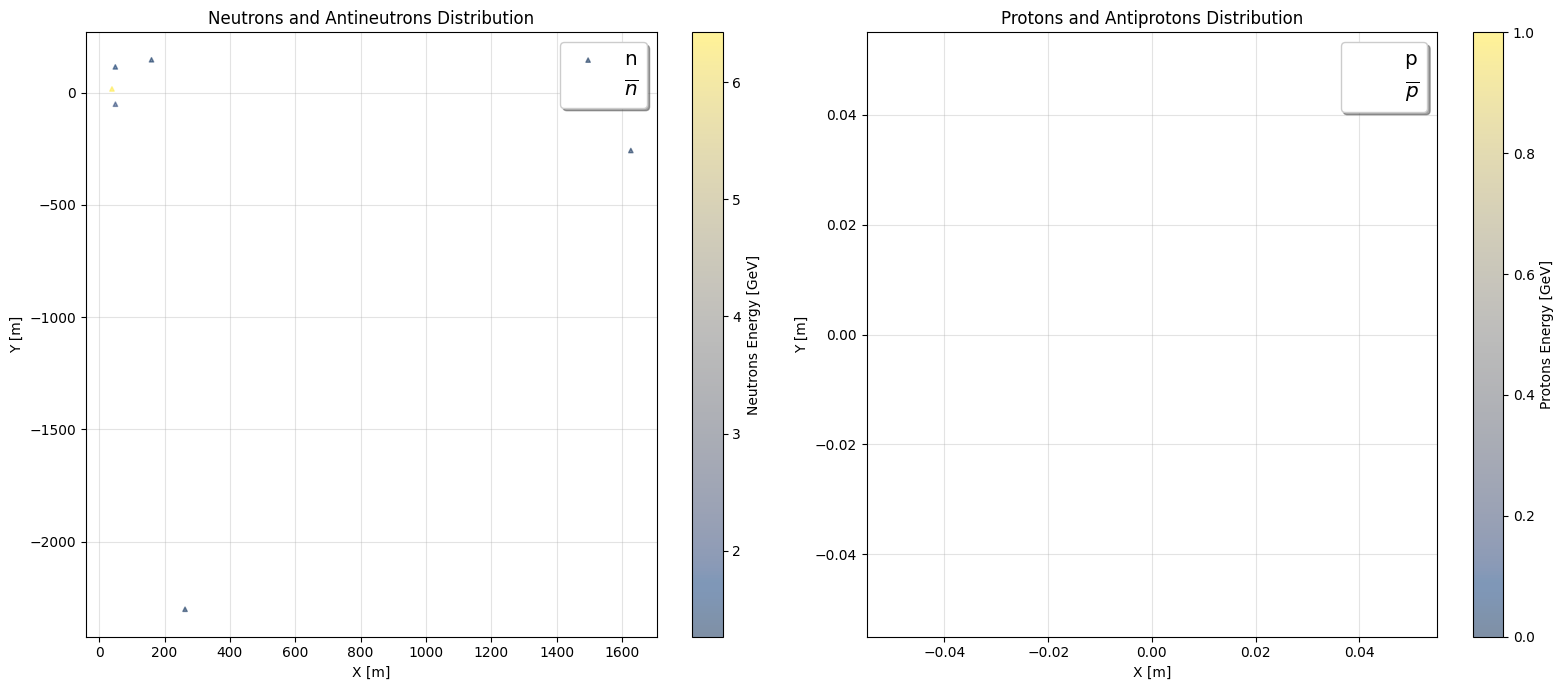

Neutrons and Antineutrons average energy: 2.3114411220888553 [GeV]
Protons and Antiprotons average energy: nan [GeV]


In [50]:
# Crear un DataFrame para los núcleos
nuclei_df = particles.query("pdgid in (2112, 2212, -2112, -2212)")

# Diccionario de marcadores
marker_dict = {
    2112: '^',   # Neutrón
    -2112: 'o',  # Anti-neutrón
    2212: 's',   # Protón
    -2212: 'x',  # Anti-protón
}

# Crear DataFrames separados para cada tipo de partícula
neutrons_antineutrons_df = nuclei_df.query("pdgid in (2112, -2112)")
protons_antiprotons_df = nuclei_df.query("pdgid in (2212, -2212)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Primer gráfico para neutrones y antineutrones
for pdgid, marker in marker_dict.items():
    if pdgid in [2112, -2112]:
        subset = neutrons_antineutrons_df[neutrons_antineutrons_df['pdgid'] == pdgid]
        color = subset['energy']
        label = r'$\overline{n}$' if pdgid == -2112 else 'n'
        ax1.scatter((subset['x'])/100, (subset['y'])/100, c=color, alpha=0.5, s=10, cmap='cividis', marker=marker, label=label)

ax1.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]')
ax1.set_title('Neutrons and Antineutrons Distribution')
ax1.grid(alpha=0.35)
ax1.legend(fontsize='x-large', shadow=True)
fig.colorbar(ax1.collections[0], ax=ax1, label='Neutrons Energy [GeV]')
#ax1.set_xlim(-50, 50)
#ax1.set_ylim(-50, 50)

# Segundo gráfico para protones y antiprotones
for pdgid, marker in marker_dict.items():
    if pdgid in [2212, -2212]:
        subset = protons_antiprotons_df[protons_antiprotons_df['pdgid'] == pdgid]
        color = subset['energy']
        label = r'$\overline{p}$' if pdgid == -2212 else 'p'
        ax2.scatter((subset['x'])/100, (subset['y'])/100, c=color, alpha=0.5, s=10, cmap='cividis', marker=marker, label=label)

ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Protons and Antiprotons Distribution')
ax2.grid(alpha=0.35)
ax2.legend(fontsize='x-large', shadow=True)
fig.colorbar(ax2.collections[0], ax=ax2, label='Protons Energy [GeV]')
#ax2.set_xlim(-50, 50)
#ax2.set_ylim(-50, 50)

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()

# Guardar y mostrar la figura
plt.savefig(os.path.join(output_dir, "Nuclei_Distribution_Unscaled.png"))
plt.show()

# Imprimir la energía promedio de neutrones y antineutrones, protones y antiprotones
print("Neutrons and Antineutrons average energy:", np.mean(neutrons_antineutrons_df["energy"]), "[GeV]")
print("Protons and Antiprotons average energy:", np.mean(protons_antiprotons_df["energy"]), "[GeV]")

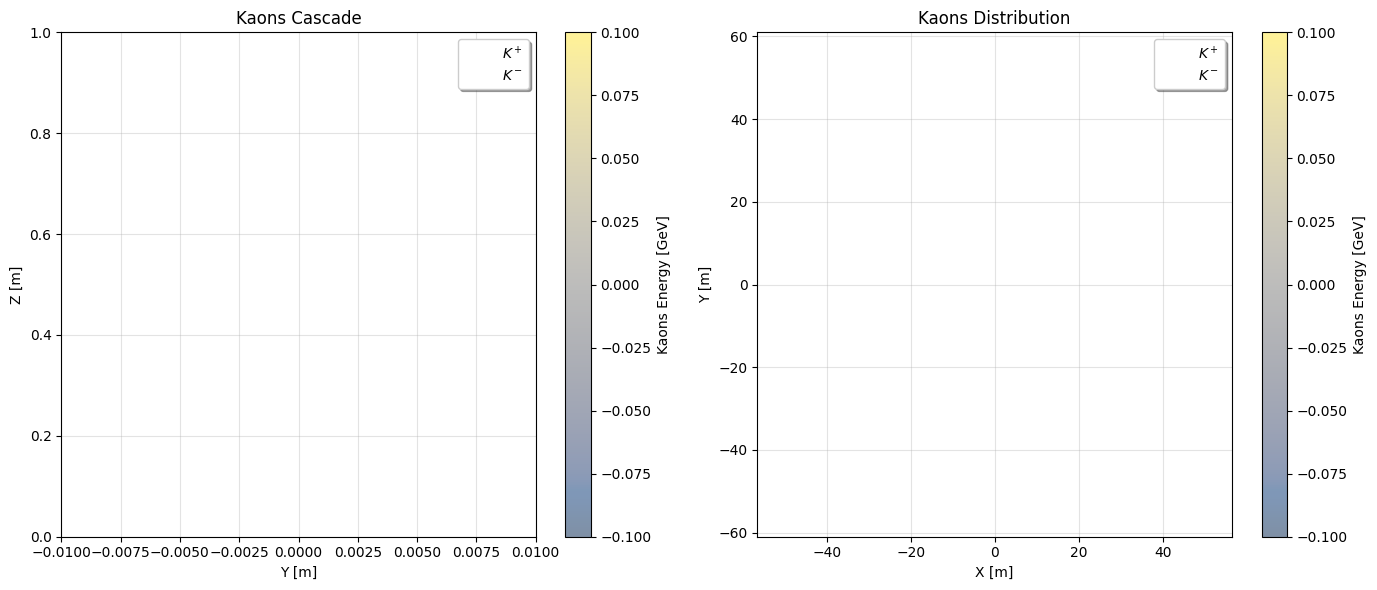

Kaons average energy: nan [GeV]


In [51]:
kaons_df = particles.query("pdgid in (321, -321)")

# Diccionario de marcadores para los kaones
markers = {
    321: 'v',    # Triángulo hacia abajo para \(K^+\)
    -321: '^',   # Triángulo hacia arriba para \(K^-\)
}

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico (Kaons: Position Y vs Position Z)
for pdgid, marker in markers.items():
    subset = kaons_df[kaons_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    mask1 = (subset['py']/100 >= -0.01) & (subset['py']/100 <= 0.01) & (subset['pz']/100 >= 0) & (subset['pz']/100 <= 1)
    filtered_subset1 = subset[mask1]
    color1 = filtered_subset1['energy']
    label = r'$K^+$' if pdgid == 321 else r'$K^-$'
    scatter1 = ax1.scatter((filtered_subset1['py'])/100, (filtered_subset1['pz'])/100, c=color1, alpha=0.5, s=10, cmap='cividis', marker=marker, label=label)

ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Kaons Cascade')
ax1.grid(alpha=0.35)
ax1.set_xlim(-0.01, 0.01)
ax1.set_ylim(0, 1)
ax1.legend(shadow=True)
cbar1 = fig.colorbar(scatter1, ax=ax1, label='Kaons Energy [GeV]')
scatter1.set_clim(color1.min(), color1.max())

# Segundo gráfico (Kaons: Position X vs Position Y)
for pdgid, marker in markers.items():
    subset = kaons_df[kaons_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    mask2 = (subset['x']/100 >= -113/2) & (subset['x']/100 <= 113/2) & (subset['y']/100 >= -61) & (subset['y']/100 <= 61)
    filtered_subset2 = subset[mask2]
    color2 = filtered_subset2['energy']
    label = r'$K^+$' if pdgid == 321 else r'$K^-$'
    scatter2 = ax2.scatter((filtered_subset2['x'])/100, (filtered_subset2['y'])/100, c=color2, alpha=0.5, s=10, cmap='cividis', marker=marker, label=label)

ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Kaons Distribution')
ax2.grid(alpha=0.35)
ax2.set_ylim(-122/2, 122/2)
ax2.set_xlim(-113/2, 113/2)
cbar2 = fig.colorbar(scatter2, ax=ax2, label='Kaons Energy [GeV]')
scatter2.set_clim(color2.min(), color2.max())

# Agregar la leyenda al segundo gráfico
ax2.legend(shadow=True)

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()
plt.savefig(os.path.join(output_dir, "KaonsCascade_Distribution.png"))
# Mostrar la figura con ambos subplots
plt.show()

print("Kaons average energy:", np.mean(kaons_df["energy"]), "[GeV]")


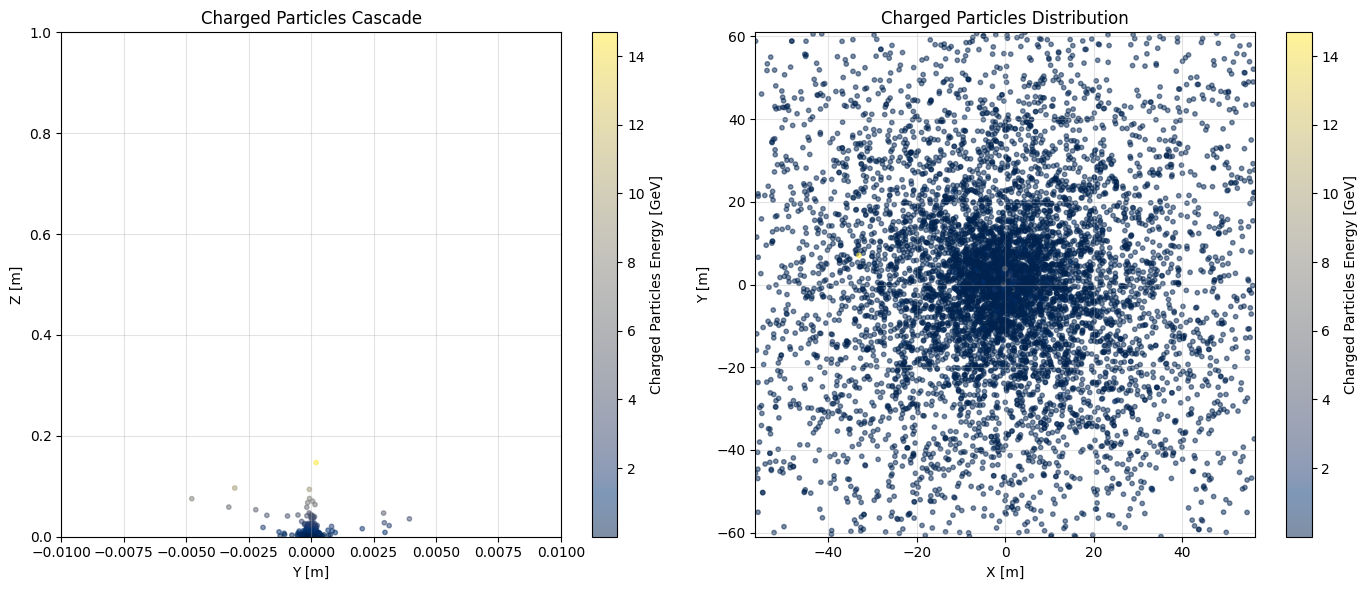

Charged Particles average energy: 0.07730844362052214 [GeV]


In [52]:
# Crear un DataFrame para las partículas cargadas
charged_df = particles.query("pdgid in (13, -13, 11, -11, 211, -211, 321, -321)")

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico (Charged Particles: Position Y vs Position Z)
mask1 = (charged_df['py']/100 >= -0.01) & (charged_df['py']/100 <= 0.01) & (charged_df['pz']/100 >= 0) & (charged_df['pz']/100 <= 1)
filtered_df1 = charged_df[mask1]
color1 = filtered_df1['energy']
scatter1 = ax1.scatter(filtered_df1['py']/100, filtered_df1['pz']/100, c=color1, s=10, alpha=0.5, cmap='cividis')
ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Charged Particles Cascade')
ax1.set_xlim(-0.01, 0.01)
ax1.set_ylim(0, 1)
ax1.grid(alpha=0.35)
cbar1 = fig.colorbar(scatter1, ax=ax1, label='Charged Particles Energy [GeV]')

# Segundo gráfico (Charged Particles: Position X vs Position Y)
mask2 = (charged_df['x']/100 >= -113/2) & (charged_df['x']/100 <= 113/2) & (charged_df['y']/100 >= -122/2) & (charged_df['y']/100 <= 122/2)
filtered_df2 = charged_df[mask2]
color2 = filtered_df2['energy']
scatter2 = ax2.scatter(filtered_df2['x']/100, filtered_df2['y']/100, c=color2, s=10, alpha=0.5, cmap='cividis')
ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Charged Particles Distribution')
ax2.grid(alpha=0.35)
ax2.set_ylim(-122/2, 122/2)
ax2.set_xlim(-113/2, 113/2)
cbar2 = fig.colorbar(scatter2, ax=ax2, label='Charged Particles Energy [GeV]')

# Ajustar los límites de los colores en los scatter plots
scatter1.set_clim(color1.min(), color1.max())
scatter2.set_clim(color2.min(), color2.max())

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()

# Mostrar la figura con ambos subplots
plt.savefig(os.path.join(output_dir, "Charged_Particles_Cascade_Distribution.png"))
plt.show()

# Imprimir la energía promedio de las partículas cargadas
print("Charged Particles average energy:", np.mean(charged_df["energy"]), "[GeV]")


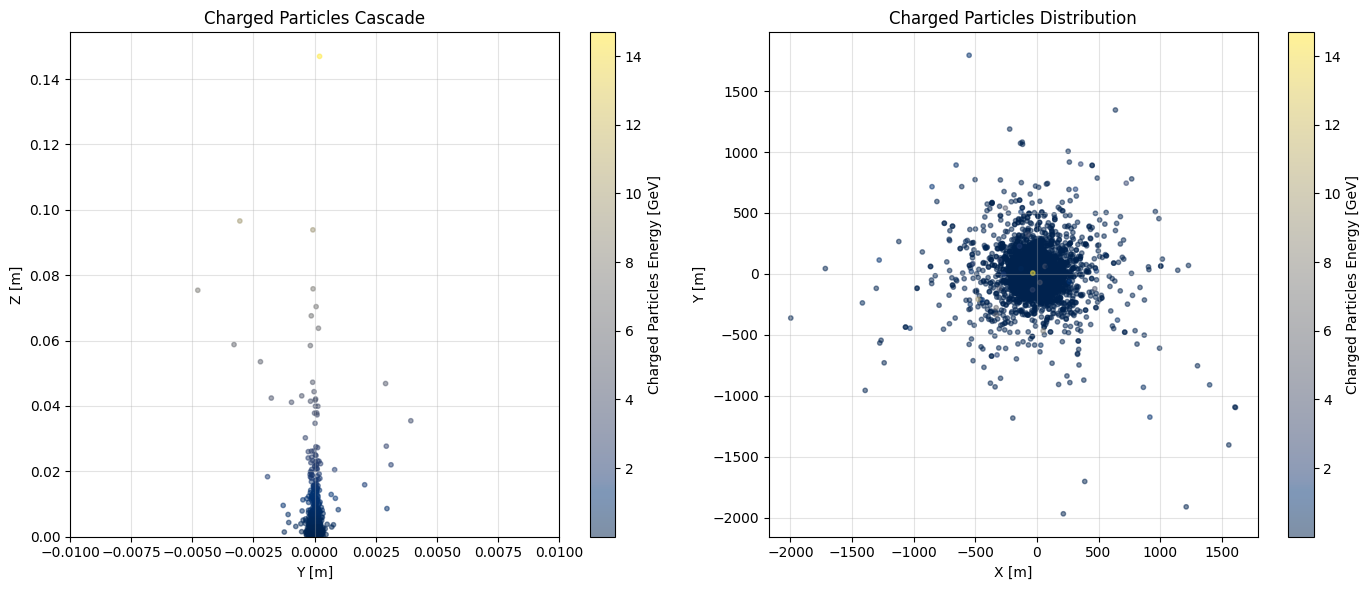

Charged Particles average energy: 0.07730844362052214 [GeV]


In [53]:
charged_df = particles.query("pdgid in (13, -13, 11, -11, 211, -211, 321, -321)")

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico (Charged Particles: Position Y vs Position Z)
scatter1 = ax1.scatter(charged_df['py']/100, charged_df['pz']/100, c=charged_df['energy'], s=10, alpha=0.5, cmap='cividis')
ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Charged Particles Cascade')
ax1.grid(alpha=0.35)
ax1.set_xlim(-0.01, 0.01)
ax1.set_ylim(0, )
cbar1 = fig.colorbar(scatter1, ax=ax1, label='Charged Particles Energy [GeV]')

# Segundo gráfico (Charged Particles: Position X vs Position Y)
scatter2 = ax2.scatter(charged_df['x']/100, charged_df['y']/100, c=charged_df['energy'], s=10, alpha=0.5, cmap='cividis')
ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Charged Particles Distribution')
ax2.grid(alpha=0.35)
#ax2.set_xlim(-50, 50)
#ax2.set_ylim(-50, 50)
cbar2 = fig.colorbar(scatter2, ax=ax2, label='Charged Particles Energy [GeV]')

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()

# Mostrar la figura con ambos subplots
plt.savefig(os.path.join(output_dir, "Charged_Particles_Cascade_Distribution_Unscaled.png"))
plt.show()

# Imprimir la energía promedio de las partículas cargadas
print("Charged Particles average energy:", np.mean(charged_df["energy"]), "[GeV]")

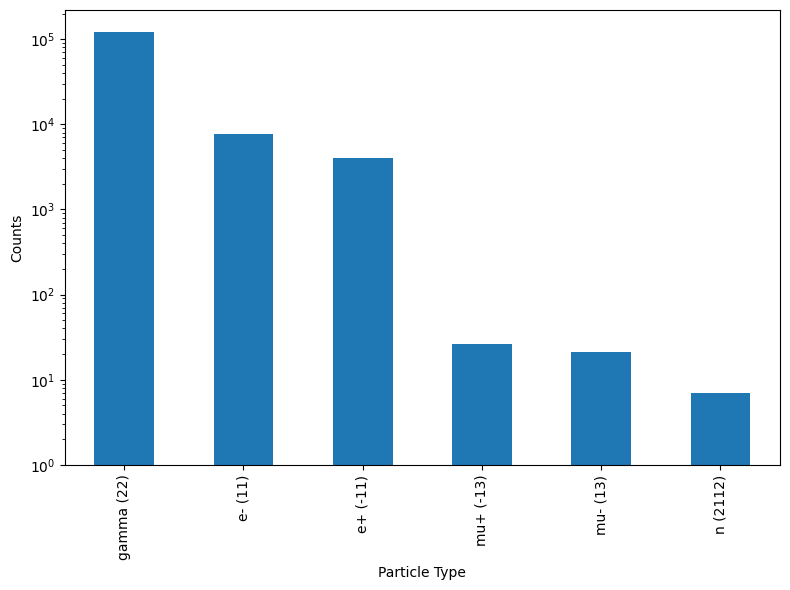

In [54]:
fig, ax = plt.subplots(figsize=(8, 6))

counts = particles["pdgid"].value_counts()
counts.index = counts.index.map(
    lambda pid: f"{Particle.from_pdgid(pid).name} ({pid})"
    if pid != 0
    else "unknown (0)"
)
counts.plot(kind="bar", log=True)

ax.set_ylabel("Counts")
ax.set_xlabel("Particle Type")

fig.tight_layout()
plt.savefig(os.path.join(output_dir, "Particles_count.png"))
None


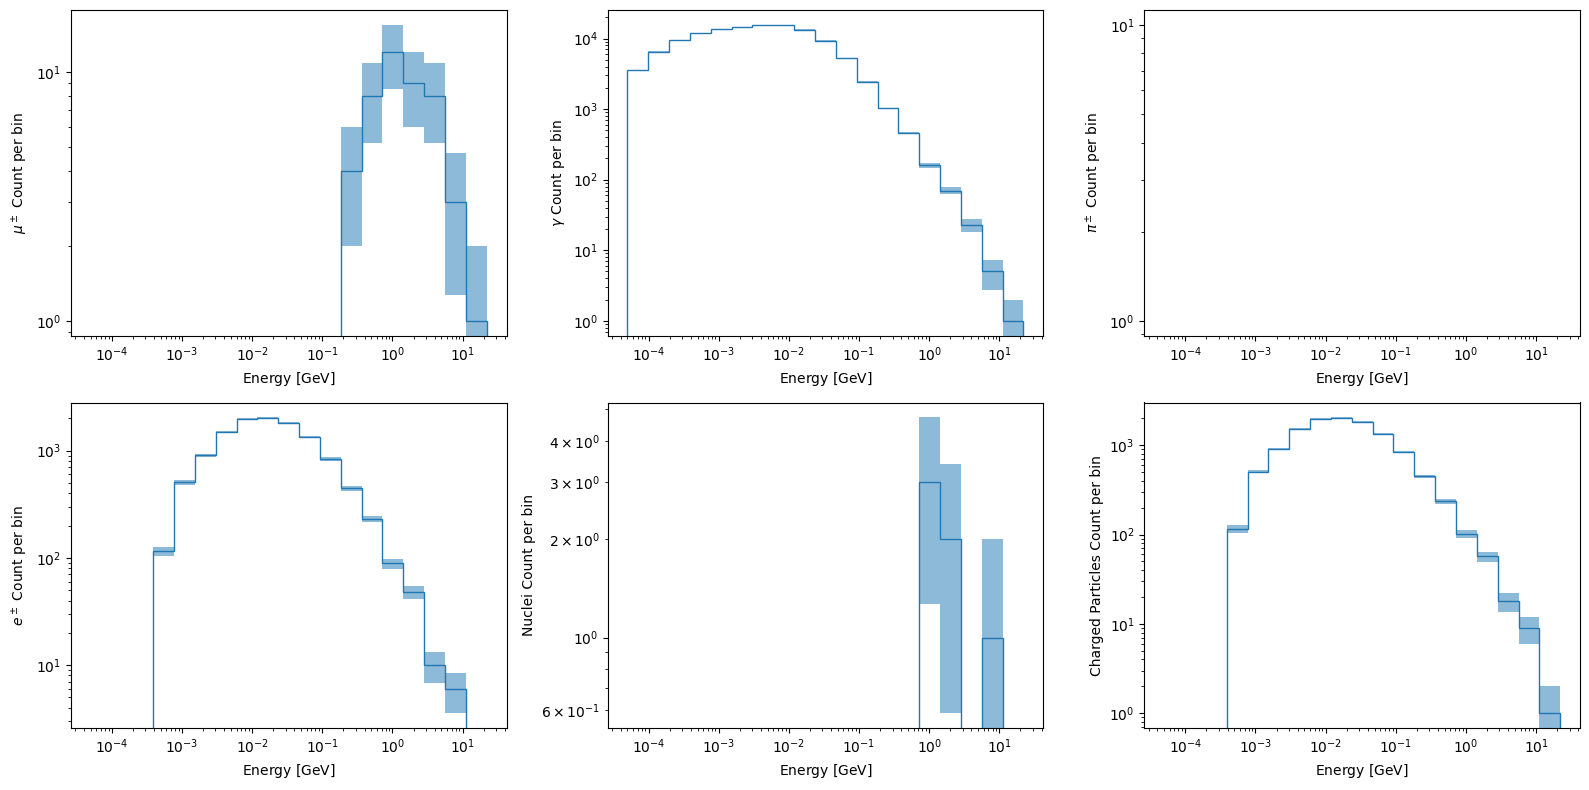

In [55]:
# Select energies for each type of particle
e_muons = particles.query("pdgid in (13, -13)")["energy"]
e_photons = particles.query("pdgid == 22")["energy"]
e_pions = particles.query("pdgid in (211, -211)")["energy"]
e_electrons = particles.query("pdgid in (11, -11)")["energy"]
e_nuclei = particles.query("pdgid in (2112, -2112, 2212, -2212)")["energy"]
e_charged = particles.query("pdgid in (13, -13, 11, -11, 211, -211, -321, 321)")["energy"]

# Create a new figure with 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(16, 8))

# List of energies and labels for each type of particle
energies = [e_muons, e_photons, e_pions, e_electrons, e_nuclei, e_charged]
labels = [r"$\mu^\pm$", r"$\gamma$", r"$\pi^\pm$", r"$e^\pm$", "Nuclei", "Charged Particles"]

# Use logarithmically sized bins
bins = np.geomspace(min([e.min() for e in energies]), max([e.max() for e in energies]), 20)

# Iterate over each type of particle and plot the histogram in the corresponding subplot
for i, (energy, label) in enumerate(zip(energies, labels)):
    # Get the counts in each bin
    counts, _ = np.histogram(energy, bins=bins)
    
    # Calculate the subplot index (row, column)
    row = i // 3
    col = i % 3
    
    # Plot the histogram and error bands
    axs[row, col].stairs(
        counts,
        bins,
    )
    axs[row, col].fill_between(
        bins[1:], counts - np.sqrt(counts), counts + np.sqrt(counts), step="pre", alpha=0.5
    )
    
    # Set logarithmic scales
    axs[row, col].set_yscale("log")
    axs[row, col].set_xscale("log")
    
    # Add labels and titles
    axs[row, col].set_xlabel("Energy $[\mathrm{GeV}]$")
    axs[row, col].set_ylabel(f"{label} Count per bin")

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Energies_Distribution.png"))
# Show the figure
plt.show()